# K-means

In [2]:
# %load /Users/xwp/.ipy_import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.preprocessing as preprocess
import sklearn.cross_validation as CV
import sklearn.metrics as skmetrics
import seaborn as sn
import scipy
import itertools as iter
%matplotlib inline
sn.set_context('notebook')
sn.set()


## Simple k-means
Data-set came from Andrew-NG，2012，ex7data2

In [15]:
data = pd.read_table('k-mean.text',sep='[ ]*',names=['x','y'],engine='python');
data.head()

,x,y
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


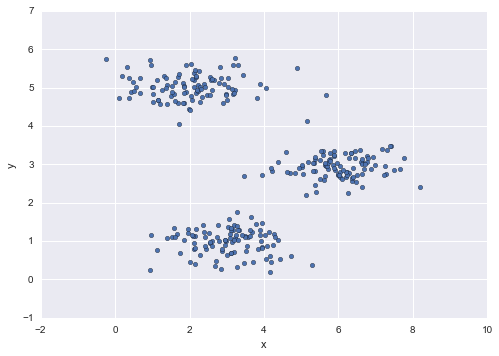

In [20]:
data.plot.scatter('x','y')

k-means：
1. Assign every point to closest centroid 
2. Find mean value as new centroid for every set

In [656]:
def update(dt, center):
    k = len(center)
    # find closest centroid
    dt['center'] = dt[['r','g','b']].apply(lambda x: find_closest(x,center),raw = True,axis=1)
    # calculate the mean for every set
    foo = dt.groupby('center')
    for x in foo.groups.keys():
        center[x] = foo.get_group(x).mean().values[:-1]
    return center

# using numpy
def find_closest(point, center):
    dis = np.apply_along_axis(lambda x: np.dot(point-x,point-x),  1,center )
    return np.argmin(dis)
            
def update2(dt, center):
    k = len(center)
    # find closest centroid
    idx = np.apply_along_axis(lambda x: find_closest(x,center),1,dt)
    # calculate the mean for every set
    for i in range(k):
        center[i] = dt[idx==i].mean(axis=0) 
    return center

Calculate k-means:
1. random choice point in the data set as start point
2. repeat update until centroid don't change or reach max iter_times

0
1
2
3
4


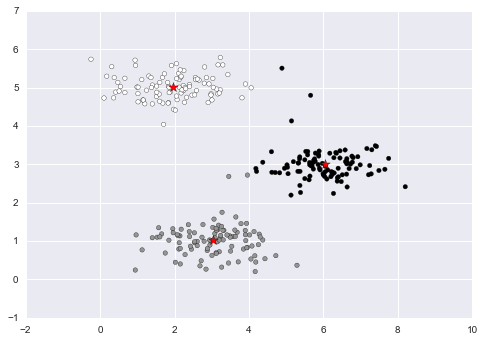

In [312]:
center_sample = np.random.choice(np.arange(data.shape[0]),3)
center = data[['x','y']].iloc[center_sample].values
old_center = center.copy()
for i in range(10):
    center = update(data[['x','y']],center)
    print i
    threshold = 0
    for x in range(len(center)):
        threshold += np.dot(center[x]-old_center[x], center[x]-old_center[x])
    if threshold < 0.00000001:
        break
    else:
        old_center = center.copy()
plt.scatter(data.x,data.y, c=data.center)
plt.scatter(center[:,0],center[:,1],marker='*',s=100,c='r');

k-means++: choice better initial centroids

In [337]:
def find_max_p(dt, center):
    n = dt.shape[0]
    res = np.zeros(n)
    for i in range(n):
        tmp = np.infty
        y = dt[i,:]
        for x in center:
            tmp = min(np.dot(y-x,y-x), tmp)
        res[i] = tmp**2
    sm = np.sum(res)
    return res/sm
        
def init_kmean(dt,k):
    n, m = dt.shape
    center = np.zeros((k,m))
    center[0,:] = dt[np.random.choice(range(n)),:]
    for i in range(1,k):
        ind = np.random.choice(range(n), p=find_max_p(dt,center[:i]))
        center[i,:] = dt[ind,:]
    return center

0
1
2
3


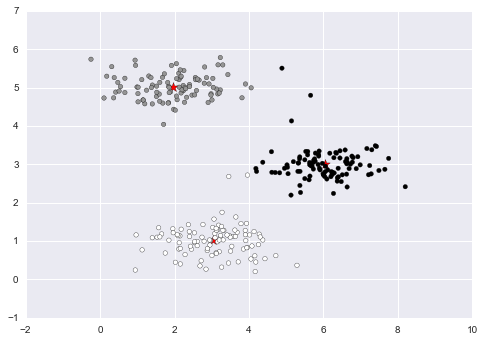

In [652]:
# plt.scatter(data.x,data.y)
center = init_kmean(data[['x','y']].values,3)
old_center= center.copy()
for i in range(10):
    center = update2(data[['x','y']].values,center)
    print i
    threshold = 0
    for x in range(len(center)):
        threshold += np.dot(old_center[x]-center[x],old_center[x]-center[x])
    if threshold < 0.000000001:
        break
    old_center = center.copy()
plt.scatter(center[:,0],center[:,1],marker='*',s=100,c='r')
plt.scatter(data.x,data.y, c=data.center)

## Image Compression

In [702]:
pixel0 = scipy.misc.imread('bird_small.png')
pixel = pixel0.copy()

# reshape 128*128*3 to m*3, m = 128*128
pixel = pixel.reshape((128*128,pixel_rgb))
# using k-means with k = 16
pixel = pixel/255.0
pixel_center_init = np.random.choice(len(pixel),size=16)
pixel_center = pixel[pixel_center_init]
# pixel_pandas = pd.DataFrame(pixel,columns=['r','g','b'])
# pixel_pandas.head()

In [703]:
for i in range(9):
    update2(pixel, pixel_center)
    print i

0
1
2
3
4
5
6
7
8


In [704]:
for (i,x) in enumerate(pixel):
    ind = find_closest2(x, pixel_center)
    pixel[i] = pixel_center[ind]

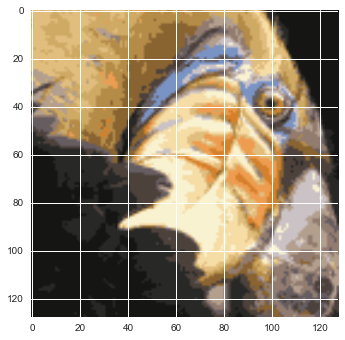

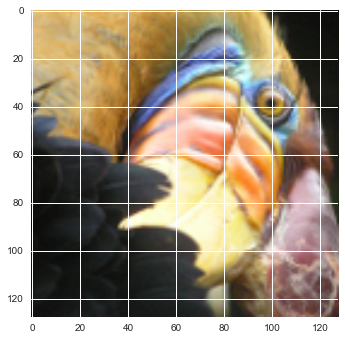

In [707]:
compress = np.apply_along_axis(lambda x: x,1,pixel)
compress = compress.reshape((128,128,pixel_rgb))
plt.imshow(compress);
plt.show()
plt.imshow(pixel0);

In [681]:
# Using sklearn
from sklearn import cluster
km = cluster.KMeans(16)
km.fit(pixel)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=16, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [682]:
B = km.cluster_centers_[km.labels_].reshape((128,128,3))

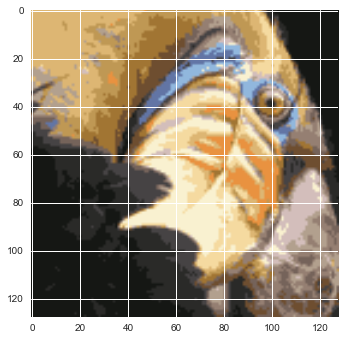

In [725]:
plt.imshow(B)

# PCA

## Visualize simple PCA

(50, 2)


,x,y
0,3.381563,3.389113
1,4.527875,5.854178
2,2.655682,4.411995
3,2.765235,3.715414
4,2.846560,4.175506


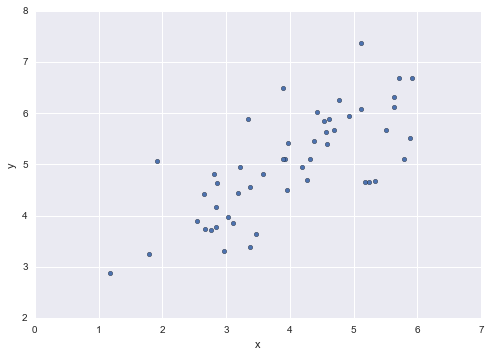

In [747]:
pca0 = pd.read_table('pca.txt',names=['x','y'],sep='[ \t]*',engine='python')
pca = pca0.copy()
print pca.shape
pca.plot.scatter('x','y')
pca.head()

In [755]:
# normalize the data
pca = pca0.copy()
mean = pca.mean(axis=0).values
std = pca.std(axis=0).values
print 'before normalize, mean and std are: ', mean, std
pca.x = (pca.x-mean[0])/std[0]
pca.y = (pca.y-mean[1])/std[1]
# pca.plot.scatter('x','y');
print 'after normalize: ', pca.mean(axis=0).values, pca.std(axis=0).values

# check if there are missing data
print 'null data number is:', pca.isnull().sum().sum()

before normalize, mean and std are:  [ 3.98926528  5.00280585] [ 1.17304991  1.02340778]
after normalize:  [  1.88737914e-16  -5.28466160e-16] [ 1.  1.]
null data number is: 0


## Do PCA
PCA means to find the eigen vectors of $\sum_{i}[x_i,y_i]^T*[x_i,y_i]$

In [763]:
pca_matrix = np.dot(pca.values.transpose(),pca.values)/pca.shape[0]
print pca_matrix
eig_value, eig_vector = np.linalg.eig(pca_matrix)
lamb1, lamb2 = eig_value
vec1, vec2 = eig_vector[:,0], eig_vector[:,1]
print lamb1, lamb2
print vec1, vec2

[[ 0.98        0.72081977]
 [ 0.72081977  0.98      ]]
0.259180231262 1.70081976874
[-0.70710678  0.70710678] [-0.70710678 -0.70710678]


Project and recover of data (to eigenvector 2):

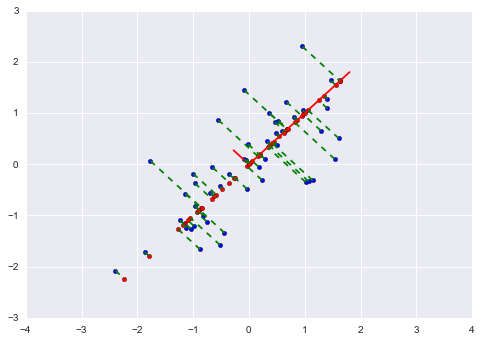

In [819]:
# visualize pca
plt.plot([0,vec1[0]*lamb1*1.5],[0,vec1[1]*lamb1*1.5],c='r')
plt.plot([0,-vec2[0]*lamb2*1.5],[0,-vec2[1]*lamb2*1.5],c='r')
plt.scatter(pca.x,pca.y)
plt.xlim(-4,4)
plt.ylim(-3,3)
# pca_project is project to eigenvector2
pca_project = np.dot(pca.values,vec2)
# pca_recove is to recove the project data to original space
pca_recove = np.dot(pca_project[:,np.newaxis],vec2[np.newaxis,:])
plt.scatter(pca_recove[:,0],pca_recove[:,1],marker='o',c='r')
for i in range(pca_recove.shape[0]):
    x = pca.values[i,:]
    xx = pca_recove[i,:]
    plt.plot([x[0],xx[0]],[x[1],xx[1]],'g--')

## Image Using PCA


### Doing PCA Manually
Using numpy to find eigenvectors

In [820]:
face0 = np.loadtxt('face.txt')

(5000, 1024)


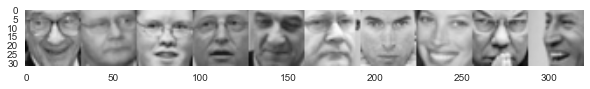

In [894]:
face=face0.copy()
print face.shape

import matplotlib as mpl
cmap = mpl.cm.Greys_r
norm = mpl.colors.Normalize(vmin=0)
plt.figure(figsize=(10,10))
plt.imshow(face[:10,:].reshape((32*10,32)).transpose(),cmap=cmap)
plt.grid(False)

In [902]:
# prepare data
mean = face.mean(axis=0)
std = face.std(axis=0)
face=(face-mean)/std
print face.mean(axis=0)
print face.std(axis=0)

[ -1.77433179e-14  -1.81052062e-14  -1.88920435e-14 ...,   1.68333569e-14
   2.58689292e-14   2.88271629e-14]
[ 1.  1.  1. ...,  1.  1.  1.]


In [903]:
def my_pca(matr, k):
    matr_reduce = np.dot(matr.transpose(),matr)
    eig_value, eig_vec = np.linalg.eig(matr_reduce)
    return eig_vec[:,:k]

faceVec = my_pca(face,36)

(1024, 36)
(5000, 36)
(5000, 1024)


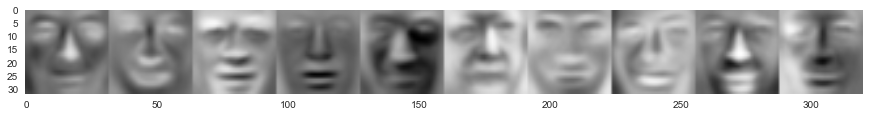

original face images


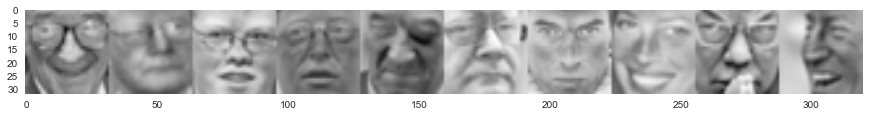

In [904]:
# vec[i] = faceReduce[-i]
print faceVec.shape
# project every data to eigen vectors
faceProject = np.dot(face, faceVec)
print faceProject.shape
# recove back into original space
faceRecove = np.dot(faceProject, faceVec.transpose())
print faceRecove.shape
# plot images
plt.figure(figsize=(15,15))
plt.imshow(faceRecove[:10,:].reshape(32*10,32).transpose(),cmap=cmap)
plt.grid(False)
plt.show()
print 'original face images'
plt.figure(figsize=(15,15))
plt.imshow(face[:10,:].reshape(32*10,32).transpose(),cmap=cmap)
plt.grid(False)

### Using sklearn
Find first 36 eigen vector

In [905]:
face = sk.preprocessing.scale(face,axis=0)
print face.mean(axis=0), face.std(axis=0)
face_pca = sk.decomposition.PCA(n_components=36)
face_pca.fit(face)

[  2.11386464e-17   5.55999691e-17  -3.47810669e-16 ...,  -5.04041253e-18
  -3.94129174e-17  -2.09832152e-17] [ 1.  1.  1. ...,  1.  1.  1.]


PCA(copy=True, n_components=36, whiten=False)

reduced face images


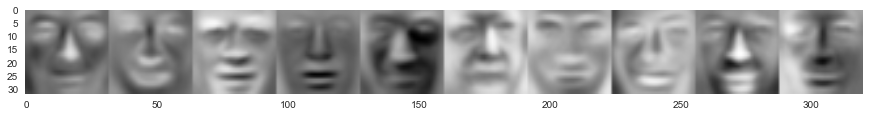

original face images


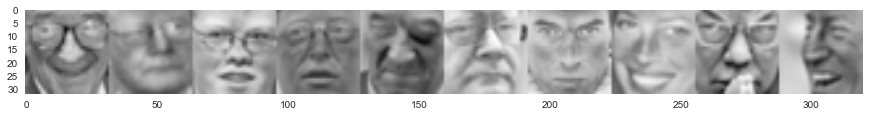

In [906]:
face_reduce = face_pca.inverse_transform(face_pca.transform(face))
print 'reduced face images'
plt.figure(figsize=(15,15))
plt.imshow(face_reduce[:10,:].reshape(32*10,32).transpose(),cmap=cmap)
plt.grid(False)
plt.show()
print 'original face images'
plt.figure(figsize=(15,15))
plt.imshow(face[:10,:].reshape(32*10,32).transpose(),cmap=cmap)
plt.grid(False)